<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values('duration')
movies.head(1)
movies.tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

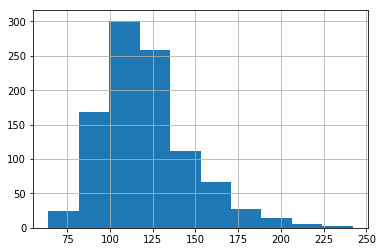

In [7]:
movies.duration.hist(bins=10)

#### Use a box plot to display that same data.

{'boxes': [<matplotlib.lines.Line2D at 0x22487f160f0>],
 'caps': [<matplotlib.lines.Line2D at 0x22487f16b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x22487f227b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x22487f22390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x22487f16240>,
  <matplotlib.lines.Line2D at 0x22487f166d8>]}

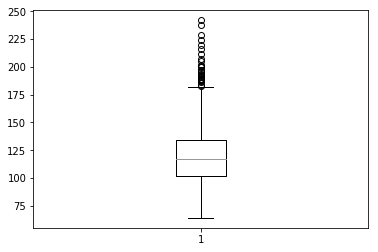

In [8]:
plt.boxplot(movies.duration)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies.content_rating.value_counts(dropna = False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,1,'Number of Movies by Ratings')

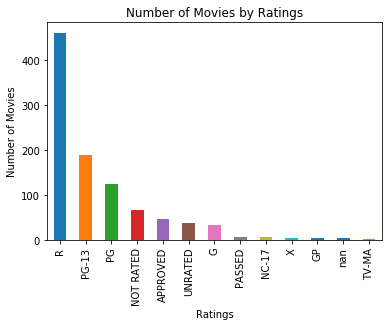

In [10]:
movies.content_rating.value_counts(dropna = False).plot(kind ='bar')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Ratings')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
movies.replace(to_replace = ('NOT RATED','APPROVED','PASSED','GP'),value = 'UNRATED',inplace=True)
movies.content_rating.value_counts(dropna = False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
movies.replace(to_replace = ('X','TV-MA'), value = 'NC-17',inplace=True)
movies.content_rating.value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
movies[movies['content_rating'].isnull()]
movies.content_rating.fillna(value = 'UNRATED')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
movies[movies['duration']>120].star_rating.mean()
movies[movies['duration']<120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

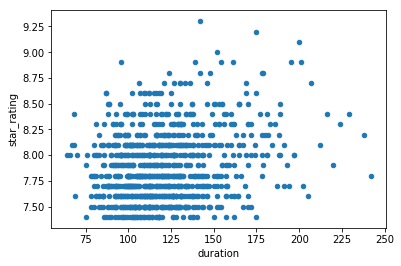

In [16]:
movies.plot(kind = 'scatter', x = 'duration', y = 'star_rating')

#### Calculate the average duration for each genre.

In [17]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

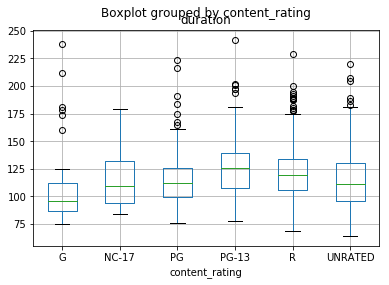

In [18]:
#movies.groupby('content_rating').duration.mean().plot(kind='Bar')
movies.boxplot(column = 'duration', by ='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [19]:
movies['title'][movies.groupby('genre').star_rating.idxmax()]

3                                    The Dark Knight
7      The Lord of the Rings: The Return of the King
30                                     Spirited Away
8                                   Schindler's List
25                                 Life Is Beautiful
0                           The Shawshank Redemption
5                                       12 Angry Men
468                       E.T. the Extra-Terrestrial
638                        The City of Lost Children
105                                    The Third Man
338                              Battleship Potemkin
39                                            Psycho
38                                       Rear Window
145                                     Blade Runner
350                                Shadow of a Doubt
6                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
# Answer:
movies.title.value_counts()
movies.duplicated(subset= 'title').sum()
movies[movies.duplicated(subset = 'title', keep =False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [21]:
# Answer:
movies.genre.value_counts()
genre_filter = ['Drama', 'Comedy', ' Action','Crime', 'Biography','Adventure','Animation','Horror','Mystery']
movies[movies.genre.isin(genre_filter)].groupby('genre').star_rating.mean()

genre
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [22]:
# Answer:
values = movies.genre.value_counts()
filter_list = values[values>10].index.tolist()
movies[movies.genre.isin(filter_list)].groupby('genre').star_rating.mean()



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [23]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [24]:
# Answer:
movies.groupby('genre').star_rating.agg(['count','mean'])[movies.groupby('genre').star_rating.agg(['count','mean'])['count']>10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [25]:
movies.actors_list.a

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
5      [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
6      [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
7      [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...
8      [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...
9      [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...
10     [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
11     [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
12     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
13       [u'Tom Hanks', u'Robin Wright', u'Gary Sinise']
14     [u'Elijah Wood', u'Ian McKellen', u'Viggo Mort...
15     [u'Matthew McConaughey', u'Anne Hathaway', u'J...
16     [u'Jack Nicholson', u'Louise Fletcher', u'Mich...
17     [u'Toshir\xf4 Mifune', u